In [54]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('Training_Data_Set.csv')
test = pd.read_csv('Test_Data_Set.csv')

In [4]:
train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [5]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [60]:
 ((test.drop(columns = ['Id']).describe() - train.drop(columns = ['Id','Price']).describe()) /  train.drop(columns = ['Id','Price']).describe()) * 100

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating
count,-89.509407,-89.507615,-89.507615,-89.507615,-89.540287,-89.507615
mean,1.421342,0.003955,-0.925437,-1.481580,-0.969425,-0.050093
std,12.081853,1.867705,1.867705,-6.260526,0.337912,-1.362589
min,NaN,0.827301,0.000000,614.285714,0.000000,0.000000
25%,-6.972240,0.000000,0.000000,-0.358423,0.000000,0.000000
50%,-2.319902,0.049727,-12.500000,-5.168776,-3.296703,0.000000
75%,-1.321134,0.000000,0.000000,-0.551378,0.000000,0.000000
max,-7.644599,0.000000,-18.823529,0.000000,8.035714,0.000000


In [58]:
train.drop(columns = ['Id','Price']).describe()

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating
count,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000
mean,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374
std,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336
min,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000
25%,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000
50%,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000
75%,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000
max,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000


In [59]:
test.drop(columns = ['Id']).describe()

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating
count,5.487000e+03,5615.000000,5615.000000,5615.000000,5447.000000,5615.00000
mean,9.589009e+04,2010.487622,8.512378,1875.839003,99.474573,5.99537
std,3.088547e+05,4.737177,4.737177,1402.871783,45.483800,1.39901
min,0.000000e+00,1950.000000,3.000000,100.000000,10.000000,4.00000
25%,1.441000e+04,2008.000000,5.000000,1390.000000,73.000000,5.00000
50%,6.400000e+04,2012.000000,7.000000,1798.000000,88.000000,6.00000
75%,1.338490e+05,2014.000000,11.000000,1984.000000,125.000000,7.00000
max,9.143000e+06,2016.000000,69.000000,32000.000000,968.000000,8.00000


There appears to be some sort of statistical differnce between the training and the test datasets.

In [14]:
#combining the two datasets for feature pre-processing
train_id = train['Id']
test_id = test['Id']

building = pd.concat([train.drop(columns = ['Price']),test])

In [17]:
building.reset_index(inplace=True)

In [21]:
building.drop(columns=['index'], inplace=True)

In [22]:
building

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4,5,diesel
59126,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4,5,diesel
59127,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5,5,diesel
59128,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4,7,petrol


In [28]:
(building.isnull().sum() / building.shape[0] ) *100

Id                      0.000000
Maker                   0.000000
model                   0.000000
Location                0.000000
Distance                2.264502
Owner Type              0.000000
manufacture_year        0.000000
Age of car              0.000000
engine_displacement     0.000000
engine_power            2.717741
body_type              92.291561
Vroom Audit Rating      0.000000
transmission            0.000000
door_count              0.000000
seat_count              0.000000
fuel_type               0.000000
dtype: float64

In [29]:
#dropping body type column because it is useless
building.drop(columns = ['body_type'], inplace = True)

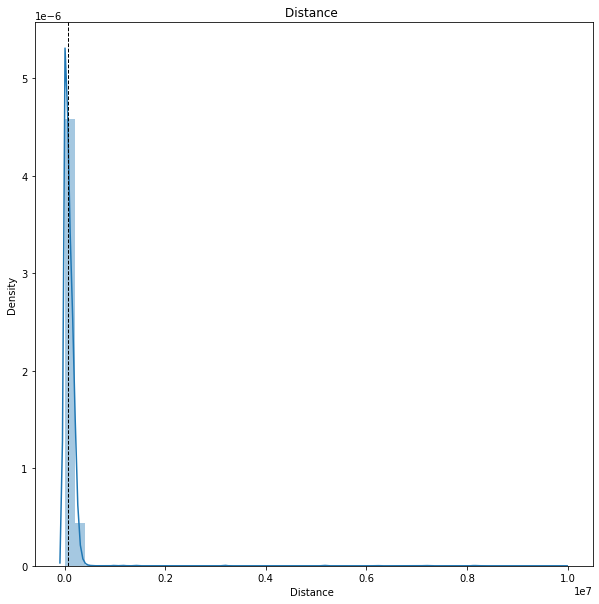

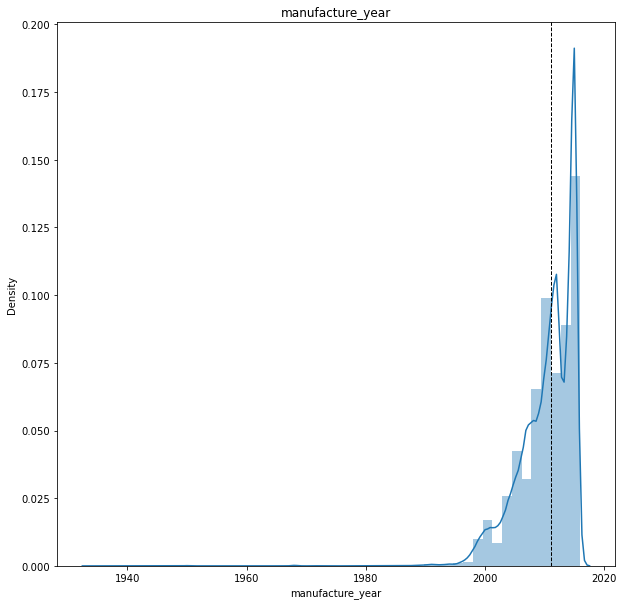

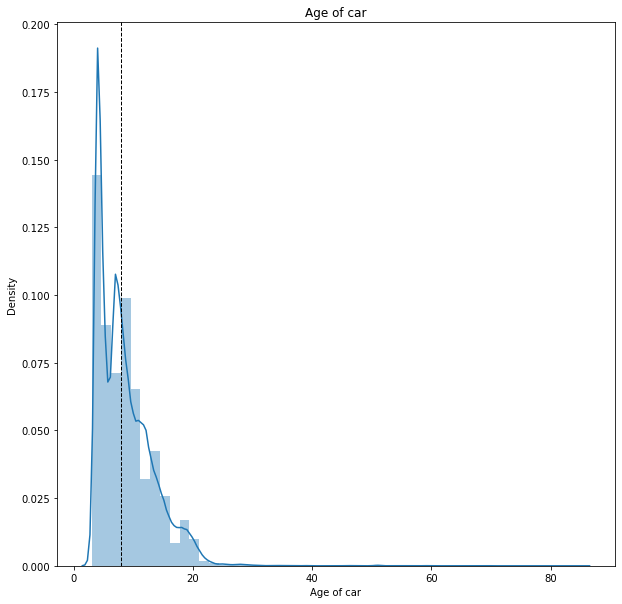

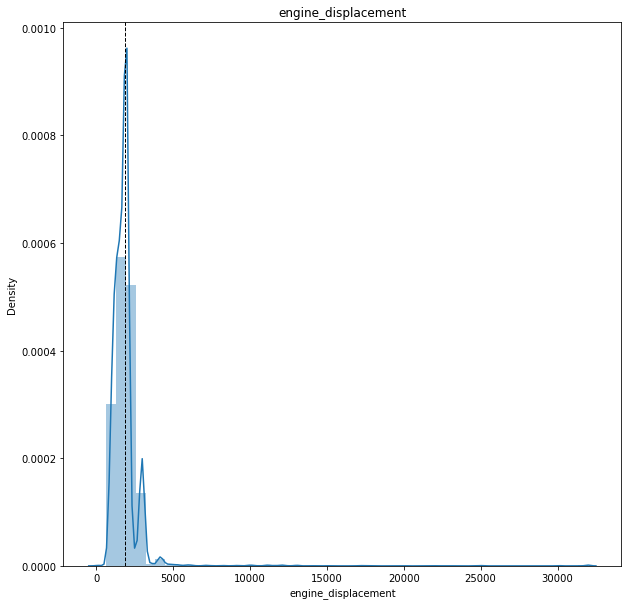

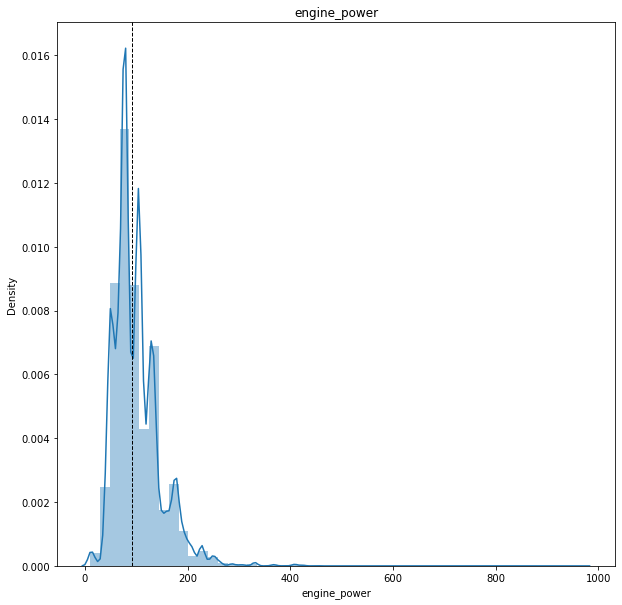

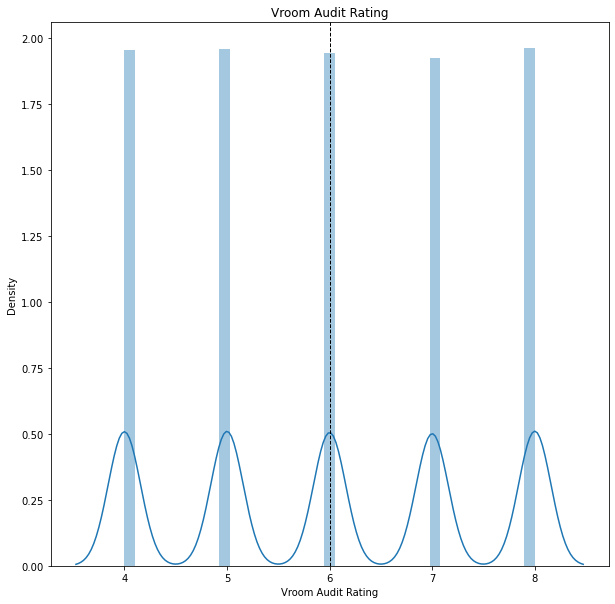

In [46]:
#other null values can be imputed
#understanding the numerical columns
import warnings
warnings.filterwarnings(action='ignore')
num_cols = building.select_dtypes(include = 'number').drop(columns = ['Id']).columns
for i in num_cols:
    plt.figure(figsize = (10,10))
    sns.distplot(building[i], kde= True)
    plt.title(i)
    plt.axvline(building[i].quantile(0.5), color='k', linestyle='dashed', linewidth=1)
    plt.show()

In [47]:
#everything is extremely skewed wtf
#understainding the non-numericl columns
building.select_dtypes(include = 'object').describe()

,Maker,model,Location,Owner Type,transmission,door_count,seat_count,fuel_type
count,59130,59130,59130,59130,59130,59130,59130,59130
unique,8,23,11,4,2,7,10,2
top,skoda,octavia,Kochi,First,man,4,5,diesel
freq,23814,13952,5507,14897,40627,37391,42924,30442


In [49]:
building['seat_count'].unique()

array(['None', '4', '5', '2', '3', '7', '6', '1', '9', '8'], dtype=object)

In [51]:
#okay so apparently there are 9 seater cars now the fuck
building.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance               1339
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1607
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [57]:
#encoding the non_numeric columns so that we can then impute the null values

In [56]:
#since we might build a UI application, I am going to build

ValueError: could not convert string to float: 'skoda'